# Task description
- The model was developed as part of a technical interview for a deep learning position in  a time duration of 1 hour.
- The goal of this task is to classify an audio file whether it's music or speech.
- The training dataset has 120 wav files, each of 30 seconds duration.
- It was hinted that MFCC are widely used in speech classification.

# Model development
- After quickly doing literature review, I found some researchers using
    - the mean and the variance of the MFCC spectrum
    - the mean and the vairance of the spectral centroid
        - **Intuition**: The power/frequency spectrum of speech is evenly distributed while that of music seems to have some spikes which will affect the "weighted average" of the spectrum/spectral centroid
- I didn't really have time to train any deep learning model so I decided to use Naive Bayes (based on the paper found here: ).

In [1]:
import glob
import librosa

def transform(filename):
    '''Compute the MFCC mean/variance and Spectral Centroid mean/variance'''
    y, sr = librosa.load(filename)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    return [mfcc.mean(), mfcc.var(), spectral_centroid.mean(), spectral_centroid.var()]

def prepare_dataset(base_dir):
    '''Form the features and target vectors out of the data directory'''
    music_files = glob.glob('{}/music_wav/*.wav'.format(base_dir))
    speech_files = glob.glob('{}/speech_wav/*.wav'.format(base_dir))
    X = [transform(f) for f in music_files] + [transform(f) for f in speech_files]
    y = [0 for _ in music_files] + [1 for _ in speech_files]
    return X, y

# Dataset investigation

In [2]:
import pandas as pd

base_dir = 'data/train/'
X, y = prepare_dataset(base_dir)
df = pd.DataFrame({'mean': [x[0] for x in X],
                   'var': [x[1] for x in X],
                   'spectral_mean': [x[2] for x in X],
                   'spectral_var': [x[3] for x in X],
                   'target': y})

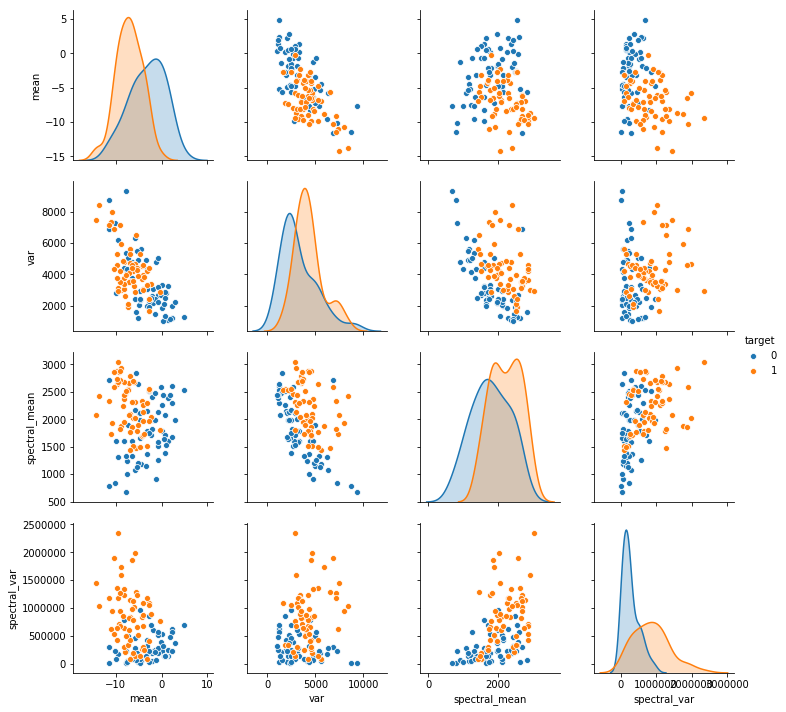

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cols = ['mean', 'var', 'spectral_mean', 'spectral_var']
sns.pairplot(df, vars=cols, hue='target');

# Model training

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_df, val_df = train_test_split(df, random_state=42)

In [6]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(train_df[cols], train_df['target']);

# Model Evaluation

In [7]:
clf.score(train_df[cols], train_df['target'])

0.8222222222222222

In [8]:
clf.score(val_df[cols], val_df['target'])

0.8666666666666667

# Nice Remarks
- The model achieves an accuracy of 82.2% and 86.6% on the training and validation datasets.
- The pairwise plot indicates that just these simple features are useful to discriminate between music and speech.
- One way of achieving data augmentation is to divide the file into 3 parts and generate new clips by permuting these parts (NICE!).
- I had the intuition that speech will have some sort of pauses (the signal drops to a very low amplitude) so using time-domain features might be useful.